In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
file = "temperature.csv"
data = pd.read_csv(file)

In [51]:
temperature = data.AverageTemperatureFahr
days = data.Days

In [52]:
def plot_data(temperature, days):
    fig = plt.figure()
    plt.plot(days, temperature, 'ro', ms=10, mec='k')
    plt.ylabel("Temperature")
    plt.xlabel("Days")

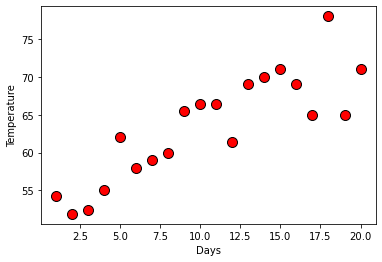

In [53]:
plot_data(temperature, days)

In [54]:
temperature = np.stack([np.ones(days.size), temperature], axis = 1)
def compute_cost_function(temperature, days, theta):
    n = days.size
    cost = 0
    cost = (1 / (2 * n)) * np.sum(np.square(np.dot(temperature, theta) - days))
    return cost

In [55]:
def gradient_descent(temperature, days, theta, alpha, iteration):
    dot_product = np.dot(temperature, theta)
    m = days.shape[0]
    cost_history = []
    theta = theta.copy()

    for i in range(iteration):
        theta = theta - (alpha / m) * (dot_product - days).dot(temperature)
        cost_value = compute_cost_function(temperature, days, theta)
        cost_history.append(cost_value)
    return theta, cost_history

In [56]:
theta = np.zeros(2)
cost = compute_cost_function(temperature, days, theta)
iterations = 1500
alpha = 0.000001

theta, cost_history = gradient_descent(temperature, days, theta, alpha, iterations)

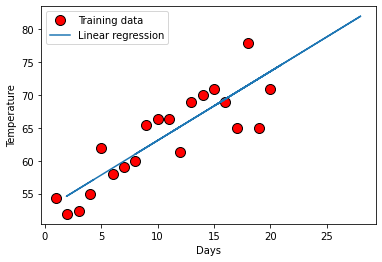

In [57]:
plot_data(temperature[:, 1], days)
plt.plot(temperature[:, 1]-50, np.dot(temperature, theta), '-')
plt.legend(['Training data', 'Linear regression']);